In [2]:
using PyPlot

In [3]:
n_workers = 7
n_task_types = 20
n_tasks_per_type = 10
quotas = rand(1:n_tasks_per_type, n_task_types)
horizon = maximum(quotas)
initial_task_lengths = rand(1:n_tasks_per_type, n_task_types)
min_task_lengths = max.(1, initial_task_lengths - rand(1:n_tasks_per_type, n_task_types))
task_bundle_times = [sum(max(min_task_lengths[j], initial_task_lengths[j]-t) for t in 1:T) for j in 1:n_task_types, T in 1:horizon]

20×10 Array{Int64,2}:
 7  13  18  22  25  27  29  31  33  35
 2   3   4   5   6   7   8   9  10  11
 3   5   6   7   8   9  10  11  12  13
 9  17  24  30  35  39  43  47  51  55
 8  15  21  26  30  33  35  36  37  38
 4   7   9  10  11  12  13  14  15  16
 6  11  16  21  26  31  36  41  46  51
 1   2   3   4   5   6   7   8   9  10
 3   5   6   7   8   9  10  11  12  13
 1   2   3   4   5   6   7   8   9  10
 4   7   9  10  11  12  13  14  15  16
 9  17  24  30  35  39  42  45  48  51
 6  11  15  18  20  21  22  23  24  25
 3   5   6   7   8   9  10  11  12  13
 9  17  25  33  41  49  57  65  73  81
 3   5   6   7   8   9  10  11  12  13
 1   2   3   4   5   6   7   8   9  10
 9  17  25  33  41  49  57  65  73  81
 5   9  12  15  18  21  24  27  30  33
 1   2   3   4   5   6   7   8   9  10

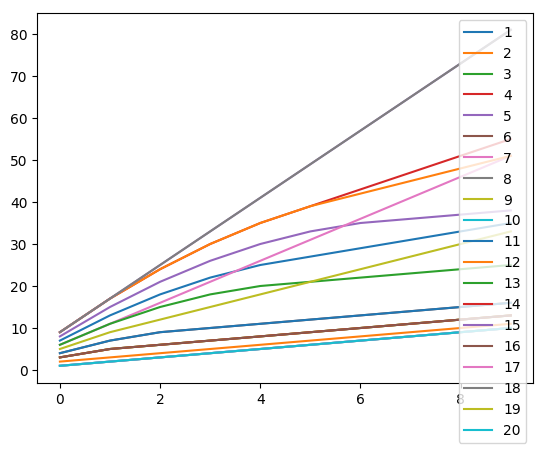

In [4]:
plot(task_bundle_times')
legend(1:n_task_types)
;

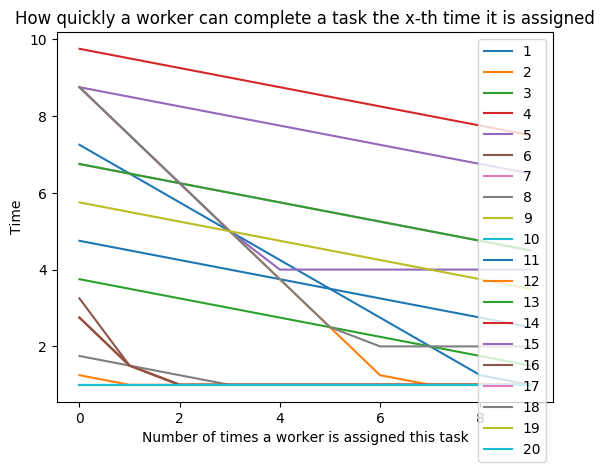

In [5]:
learning_speed = rand(0.25:0.5:1.75, n_task_types)
min_task_lengths = max.(1, initial_task_lengths - rand(1:10, n_task_types))
task_completion_speed = [(max.(min_task_lengths[j], initial_task_lengths[j]-T*learning_speed[j])) for j in 1:n_task_types, T in 1:horizon]

plot(task_completion_speed')
legend(1:n_task_types); xlabel("Number of times a worker is assigned this task"); ylabel("Time")
title("How quickly a worker can complete a task the x-th time it is assigned")
;

In [6]:
task_completion_speed

20×10 Array{Float64,2}:
 7.25  6.5  5.75  5.0  4.25  3.5  2.75  2.0  1.25  1.0
 1.25  1.0  1.0   1.0  1.0   1.0  1.0   1.0  1.0   1.0
 3.75  3.5  3.25  3.0  2.75  2.5  2.25  2.0  1.75  1.5
 9.75  9.5  9.25  9.0  8.75  8.5  8.25  8.0  7.75  7.5
 8.75  8.5  8.25  8.0  7.75  7.5  7.25  7.0  6.75  6.5
 3.25  1.5  1.0   1.0  1.0   1.0  1.0   1.0  1.0   1.0
 6.75  6.5  6.25  6.0  5.75  5.5  5.25  5.0  4.75  4.5
 1.75  1.5  1.25  1.0  1.0   1.0  1.0   1.0  1.0   1.0
 2.75  1.5  1.0   1.0  1.0   1.0  1.0   1.0  1.0   1.0
 1.0   1.0  1.0   1.0  1.0   1.0  1.0   1.0  1.0   1.0
 4.75  4.5  4.25  4.0  3.75  3.5  3.25  3.0  2.75  2.5
 8.75  7.5  6.25  5.0  3.75  2.5  1.25  1.0  1.0   1.0
 6.75  6.5  6.25  6.0  5.75  5.5  5.25  5.0  4.75  4.5
 2.75  1.5  1.0   1.0  1.0   1.0  1.0   1.0  1.0   1.0
 8.75  7.5  6.25  5.0  4.0   4.0  4.0   4.0  4.0   4.0
 2.75  1.5  1.0   1.0  1.0   1.0  1.0   1.0  1.0   1.0
 1.0   1.0  1.0   1.0  1.0   1.0  1.0   1.0  1.0   1.0
 8.75  7.5  6.25  5.0  3.75  2.5  2.0   2

In [7]:
L = rand(0:n_tasks_per_type, n_workers, n_task_types)

7×20 Array{Int64,2}:
 1   9  7  8  10   4   4  2  7   0   2   8  10   1  4   1   8  9  10  1
 8   2  2  3   6   1   2  5  7   5   0  10   2   4  5  10   8  1   9  4
 5  10  5  2   2  10   4  0  0   3   7   8   9   4  1   9   4  9   5  0
 7   6  9  7   8   1   9  5  2  10   7   7   5  10  3   7  10  7   9  2
 9   5  7  0  10   2   1  7  9  10   9   2   0   7  5   1   4  5   7  9
 9   4  0  1   3   6  10  6  2   0  10   0   7   3  7   1   0  2  10  7
 5  10  2  6   2   9   0  9  4   1   8   7   1   4  8   9   2  9   9  5

In [8]:
# task_dur is a matrix where the rows represent workers and columns represent the total time spent working
# on a particular task type
task_dur = zeros(n_workers, n_task_types)

for i=1:n_workers
    for j=1:n_task_types
        for k=1:L[i, j]
            task_dur[i, j] = task_dur[i, j] + task_completion_speed[j, k]
        end
    end
end

task_dur

7×20 Array{Float64,2}:
  7.25   9.25  21.0   71.0   76.25   6.75  …   2.75   8.0  39.75  46.25  1.0
 37.0    2.25   7.25  28.5   48.75   3.25     12.25   8.0   8.75  42.75  4.0
 28.75  10.25  16.25  19.25  17.25  12.75     11.25   4.0  39.75  26.25  0.0
 35.0    6.25  24.75  63.0   63.0    3.25      9.25  10.0  35.75  42.75  2.0
 38.25   5.25  21.0    0.0   76.25   4.75      2.75   4.0  31.25  35.0   9.0
 38.25   4.25   0.0    9.75  25.5    8.75  …   2.75   0.0  16.25  46.25  7.0
 28.75  10.25   7.25  54.75  17.25  11.75     11.25   2.0  39.75  42.75  5.0

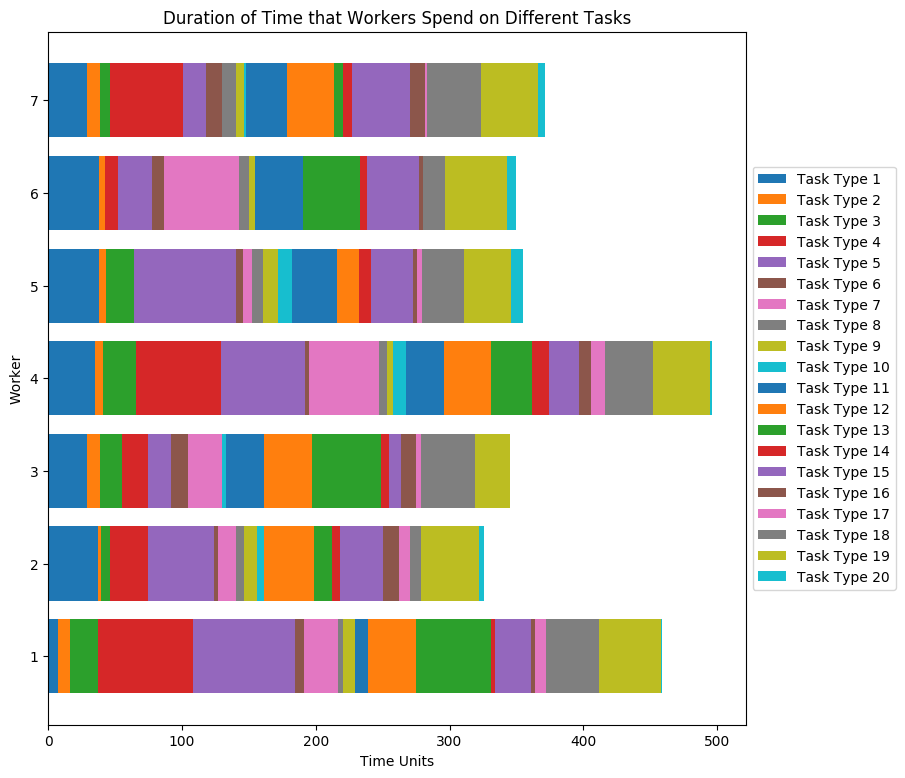

In [10]:
ind = 1:n_workers
width = 0.35

figure(figsize=[9, 9])

colors = rand(n_task_types)
lft = zeros(n_workers)

for j=1:size(task_dur)[2]
    #barh(ind, task_dur[:, j], left=lft, color=rand(3), label="Task Type $j")
    barh(ind, task_dur[:, j], left=lft, label="Task Type $j")
    lft = lft + task_dur[:, j]
end

ylabel("Worker")
xlabel("Time Units")
title("Duration of Time that Workers Spend on Different Tasks")
legend(loc="center left", bbox_to_anchor=(1, 0.5))
;